In [199]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [200]:
df = pd.read_csv('/home/veer/Desktop/Data_science_journey/Datas/Iris.csv')

In [201]:
df.shape

(150, 6)

In [202]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [203]:
df = df.iloc[:,1:]

In [204]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [205]:
from sklearn.preprocessing import LabelEncoder

In [206]:
encoder = LabelEncoder()

In [207]:
df['Species'] = encoder.fit_transform(df['Species'])

In [208]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [209]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [210]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

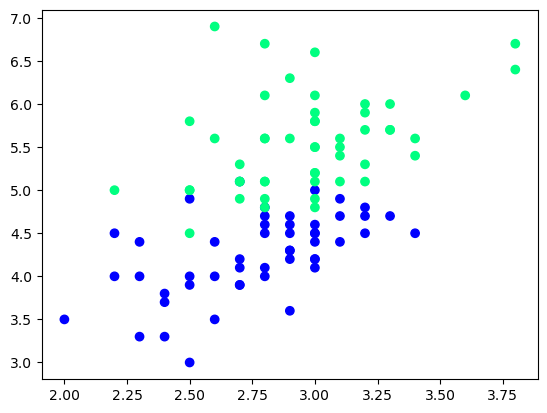

In [212]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [213]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
66,3.0,4.5,1
73,2.8,4.7,1
52,3.1,4.9,1
53,2.3,4.0,1
77,3.0,5.0,1
63,2.9,4.7,1
59,2.7,3.9,1
101,2.7,5.1,2
104,3.0,5.8,2
58,2.9,4.6,1


In [214]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [215]:
df_train

,SepalWidthCm,PetalLengthCm,Species
115,3.2,5.3,2
144,3.3,5.7,2
148,3.4,5.4,2
72,2.5,4.9,1
88,3.0,4.1,1
112,3.0,5.5,2
118,2.6,6.9,2
75,3.0,4.4,1
102,3.0,5.9,2
116,3.0,5.5,2


In [216]:
df_val

,SepalWidthCm,PetalLengthCm,Species
57,2.4,3.3,1
107,2.9,6.3,2
98,2.5,3.0,1
96,2.9,4.2,1
99,2.8,4.1,1


In [217]:
df_test

,SepalWidthCm,PetalLengthCm,Species
62,2.2,4.0,1
76,2.8,4.8,1
83,2.7,5.1,1
103,2.9,5.6,2
65,3.1,4.4,1


In [218]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [219]:
y_test

array([1, 2, 1, 1, 1])

# Case 1 - Bagging

In [220]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
115,3.2,5.3,2
72,2.5,4.9,1
115,3.2,5.3,2
75,3.0,4.4,1
112,3.0,5.5,2
88,3.0,4.1,1
112,3.0,5.5,2
148,3.4,5.4,2


In [221]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [222]:
dt_bag1 = DecisionTreeClassifier()

In [223]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

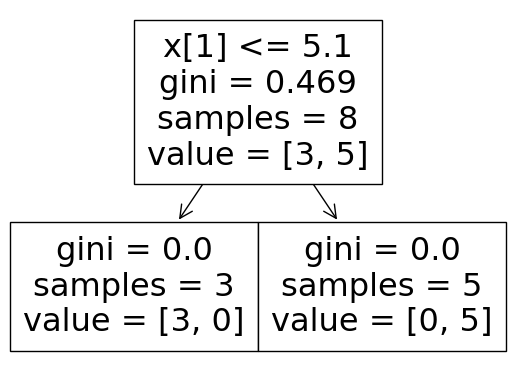

1.0


/home/veer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/veer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


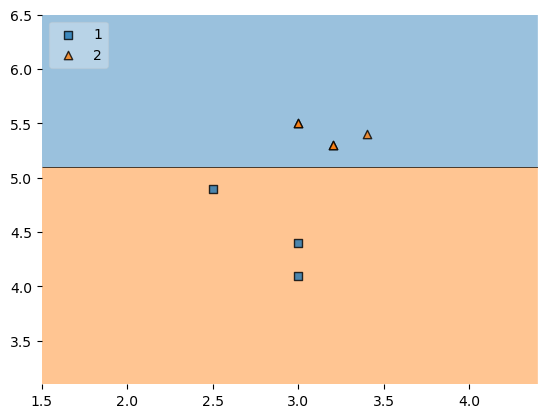

In [224]:
evaluate(dt_bag1,X,y)

In [225]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
144,3.3,5.7,2
118,2.6,6.9,2
115,3.2,5.3,2
88,3.0,4.1,1
118,2.6,6.9,2
115,3.2,5.3,2
115,3.2,5.3,2
112,3.0,5.5,2


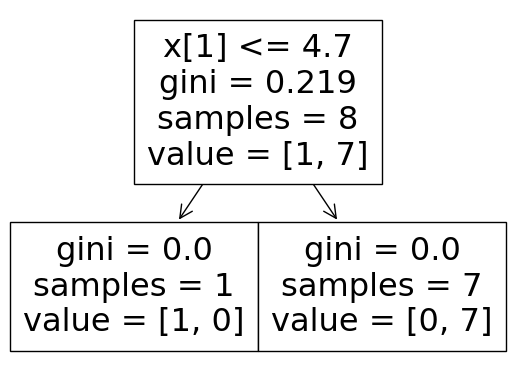

1.0


/home/veer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/veer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


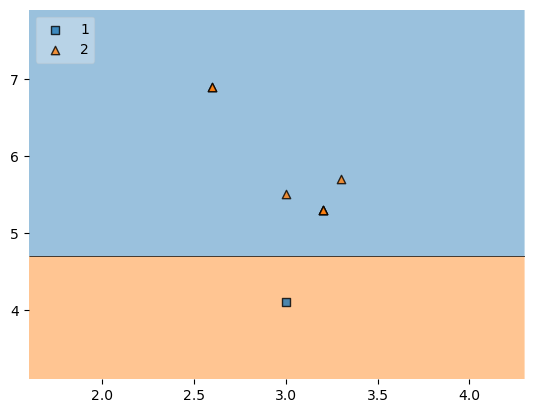

In [226]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [227]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
72,2.5,4.9,1
102,3.0,5.9,2
144,3.3,5.7,2
112,3.0,5.5,2
112,3.0,5.5,2
88,3.0,4.1,1
88,3.0,4.1,1
75,3.0,4.4,1


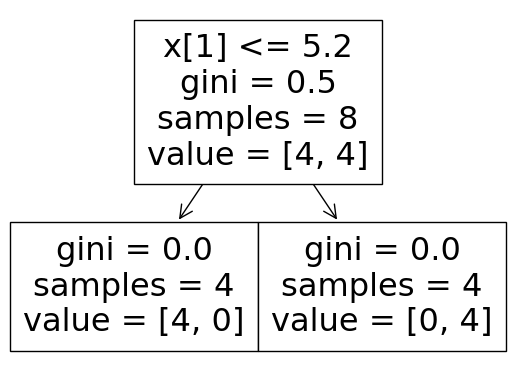

1.0


/home/veer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/veer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


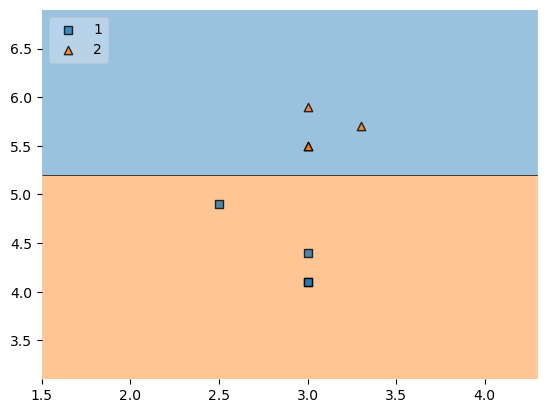

In [228]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Predict

In [229]:
df_test

,SepalWidthCm,PetalLengthCm,Species
62,2.2,4.0,1
76,2.8,4.8,1
83,2.7,5.1,1
103,2.9,5.6,2
65,3.1,4.4,1


In [230]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [1]


/home/veer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/veer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/veer/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [231]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
115,3.2,5.3,2
144,3.3,5.7,2
148,3.4,5.4,2
72,2.5,4.9,1
88,3.0,4.1,1
112,3.0,5.5,2
118,2.6,6.9,2
75,3.0,4.4,1
102,3.0,5.9,2
116,3.0,5.5,2


In [232]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
88,3.0,4.1,1
118,2.6,6.9,2
115,3.2,5.3,2
112,3.0,5.5,2
116,3.0,5.5,2
148,3.4,5.4,2
102,3.0,5.9,2
144,3.3,5.7,2


# Random Subspaces

In [233]:
# column samplaling
df1 = pd.read_csv('/home/veer/Desktop/Data_science_journey/Datas/Iris.csv')
df1 = df1.sample(10)

In [234]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
31,32,5.4,3.4,1.5,0.4,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
103,104,6.3,2.9,5.6,1.8,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa
129,130,7.2,3.0,5.8,1.6,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
28,29,5.2,3.4,1.4,0.2,Iris-setosa
85,86,6.0,3.4,4.5,1.6,Iris-versicolor


In [241]:
df1.sample(2,replace=True,axis=1)

,Species,Id
31,Iris-setosa,32
8,Iris-setosa,9
103,Iris-virginica,104
145,Iris-virginica,146
12,Iris-setosa,13
129,Iris-virginica,130
104,Iris-virginica,105
72,Iris-versicolor,73
28,Iris-setosa,29
85,Iris-versicolor,86


# Random Patches

In [236]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
31,32,5.4,3.4,1.5,0.4,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
103,104,6.3,2.9,5.6,1.8,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa
129,130,7.2,3.0,5.8,1.6,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
28,29,5.2,3.4,1.4,0.2,Iris-setosa
85,86,6.0,3.4,4.5,1.6,Iris-versicolor


In [246]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Id,SepalLengthCm
103,104,6.3
8,9,4.4
28,29,5.2
145,146,6.7
85,86,6.0
103,104,6.3
145,146,6.7
145,146,6.7
